Import dependecies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, f1_score, precision_score, recall_score

Data collection and preprocessing

In [ ]:
dataset = pd.read_csv('/content/Liver Patient Dataset (LPD)_train.csv', encoding='latin-1')


In [ ]:
dataset.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [ ]:
dataset.tail()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1
30690,30.0,Male,3.1,1.6,253.0,80.0,406.0,6.8,3.9,1.30,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4   Alkphos Alkaline Phosphotase          29895 non-null  float64
 5   Sgpt Alamine Aminotransferase         30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8   ALB Albumin                           30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [ ]:
dataset.isnull().sum()

,0
Age of the patient,2
Gender of the patient,902
Total Bilirubin,648
Direct Bilirubin,561
Alkphos Alkaline Phosphotase,796
Sgpt Alamine Aminotransferase,538
Sgot Aspartate Aminotransferase,462
Total Protiens,463
ALB Albumin,494
A/G Ratio Albumin and Globulin Ratio,559


In [ ]:
liver_dataset = dataset.dropna(how = 'any')

In [ ]:
liver_dataset.isnull().sum()

,0
Age of the patient,0
Gender of the patient,0
Total Bilirubin,0
Direct Bilirubin,0
Alkphos Alkaline Phosphotase,0
Sgpt Alamine Aminotransferase,0
Sgot Aspartate Aminotransferase,0
Total Protiens,0
ALB Albumin,0
A/G Ratio Albumin and Globulin Ratio,0


In [ ]:
liver_dataset.shape

(27158, 11)

In [ ]:
liver_dataset.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000
mean,44.125046,3.407909,1.541630,290.142021,81.279292,112.102879,6.472605,3.124044,0.943567,1.282790
std,15.971563,6.332486,2.895084,239.595473,181.571537,283.616005,1.081477,0.792329,0.324205,0.450363
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,36.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.700000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
liver_dataset['Result'].value_counts()

,count
Result,
1,19478
2,7680


1 -> Defective

2 -> nondefective

In [ ]:
liver_dataset.replace({"Gender of the patient":{'Male':0,'Female':1}}, inplace=True)

<ipython-input-117-80892c3e1d26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver_dataset.replace({"Gender of the patient":{'Male':0,'Female':1}}, inplace=True)


In [ ]:
liver_dataset.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,1,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


Data Visualization

<ipython-input-119-19d2eacde5e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age of the patient'])


<Axes: xlabel='Age of the patient', ylabel='Density'>

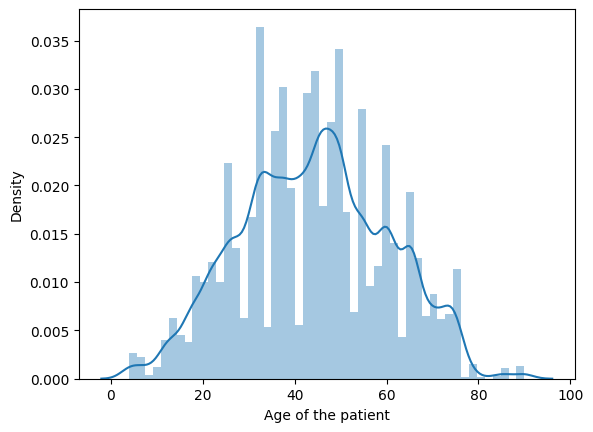

In [ ]:
sns.distplot(dataset['Age of the patient'])

<ipython-input-120-3e5ff614c48a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Total Bilirubin'])


<Axes: xlabel='Total Bilirubin', ylabel='Density'>

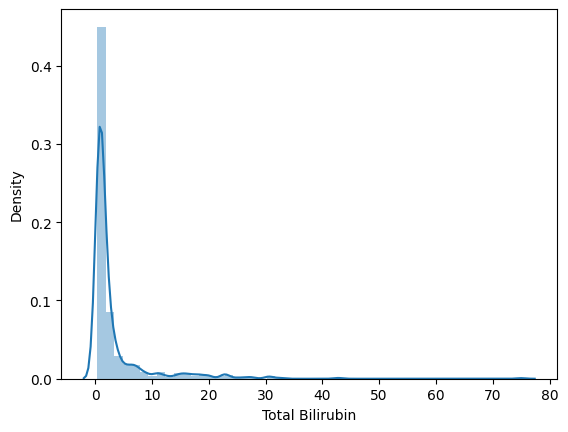

In [ ]:
sns.distplot(dataset['Total Bilirubin'])

<ipython-input-121-aca3c4b48d23>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Direct Bilirubin'])


<Axes: xlabel='Direct Bilirubin', ylabel='Density'>

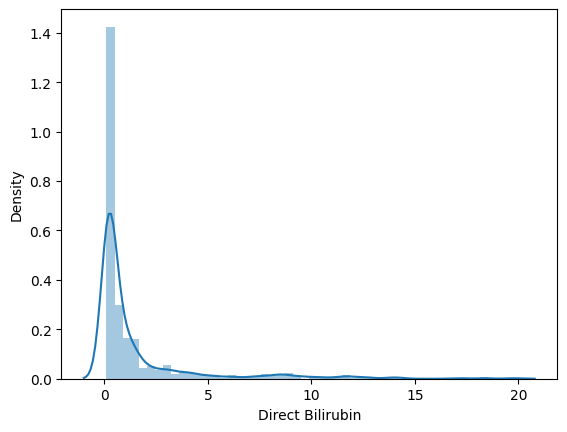

In [ ]:
sns.distplot(dataset['Direct Bilirubin'])

<ipython-input-122-aa6b9689b341>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Alkphos Alkaline Phosphotase'])


<Axes: xlabel='Alkphos Alkaline Phosphotase', ylabel='Density'>

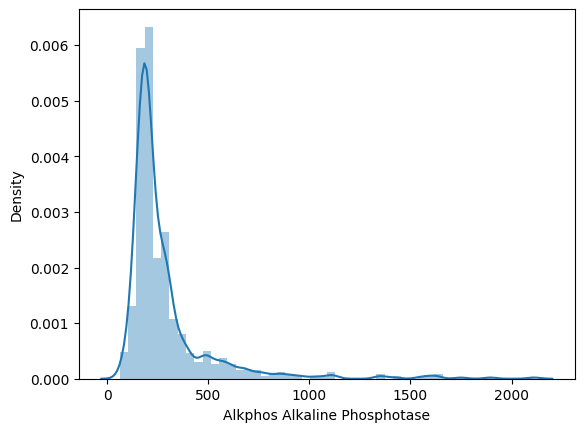

In [ ]:
sns.distplot(dataset['Alkphos Alkaline Phosphotase'])

<ipython-input-123-55539a85e474>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sgpt Alamine Aminotransferase'])


<Axes: xlabel='Sgpt Alamine Aminotransferase', ylabel='Density'>

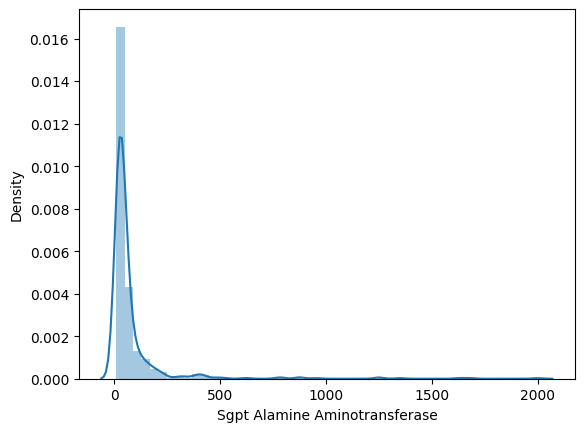

In [ ]:
sns.distplot(dataset['Sgpt Alamine Aminotransferase'])

<ipython-input-124-ba2423f78584>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sgot Aspartate Aminotransferase'])


<Axes: xlabel='Sgot Aspartate Aminotransferase', ylabel='Density'>

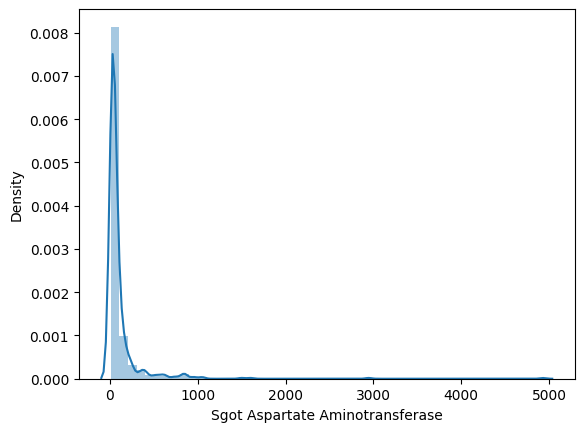

In [ ]:
sns.distplot(dataset['Sgot Aspartate Aminotransferase'])

<ipython-input-125-b5248580449c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Total Protiens'])


<Axes: xlabel='Total Protiens', ylabel='Density'>

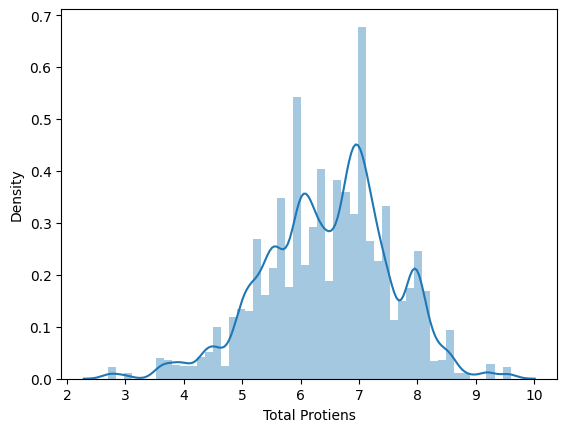

In [ ]:
sns.distplot(dataset['Total Protiens'])

<ipython-input-126-970358eb8e2f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ALB Albumin'])


<Axes: xlabel='ALB Albumin', ylabel='Density'>

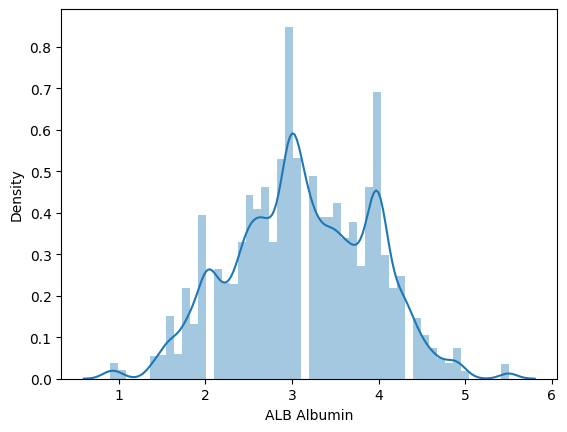

In [ ]:
sns.distplot(dataset['ALB Albumin'])

<ipython-input-127-c066cd1f8bba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['A/G Ratio Albumin and Globulin Ratio'])


<Axes: xlabel='A/G Ratio Albumin and Globulin Ratio', ylabel='Density'>

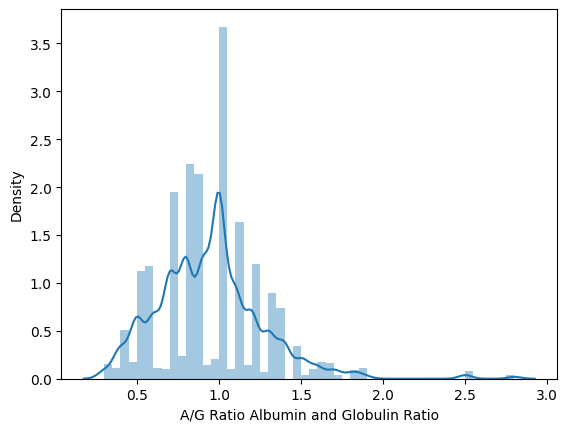

In [ ]:
sns.distplot(dataset['A/G Ratio Albumin and Globulin Ratio'])

Finding Positive and Negative correlation

In [ ]:
correlation = liver_dataset.corr()

<Axes: >

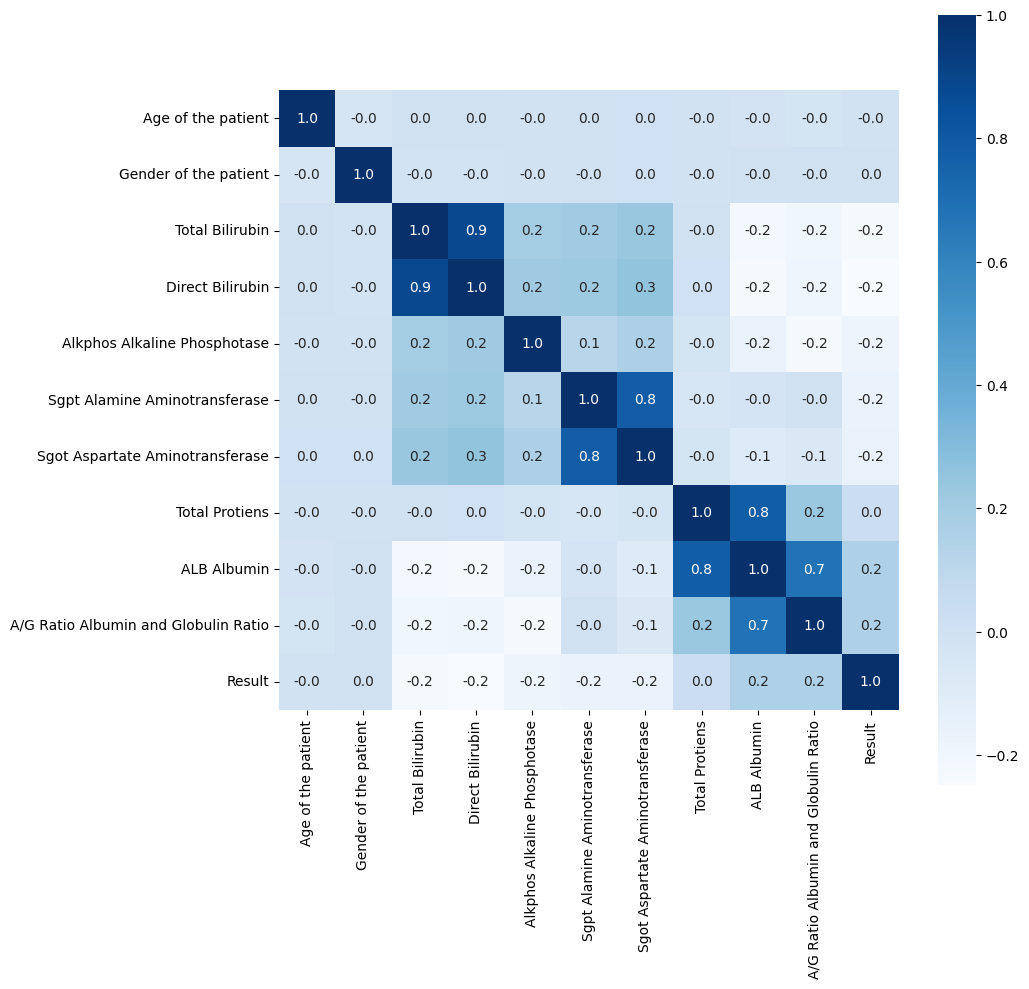

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

Seperating features and target

In [ ]:
X = liver_dataset.drop(columns='Result', axis=1)
Y = liver_dataset['Result']

In [ ]:
print(X)

       Age of the patient  Gender of the patient  Total Bilirubin  \
0                    65.0                      1              0.7   
1                    62.0                      0             10.9   
2                    62.0                      0              7.3   
3                    58.0                      0              1.0   
4                    72.0                      0              3.9   
...                   ...                    ...              ...   
30686                50.0                      0              2.2   
30687                55.0                      0              2.9   
30688                54.0                      0              6.8   
30689                48.0                      1              1.9   
30690                30.0                      0              3.1   

       Direct Bilirubin  Alkphos Alkaline Phosphotase  \
0                   0.1                         187.0   
1                   5.5                         699.0   


In [ ]:
print(Y)

0        1
1        1
2        1
3        1
4        1
        ..
30686    1
30687    1
30688    1
30689    1
30690    1
Name: Result, Length: 27158, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1337)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(27158, 10) (21726, 10) (5432, 10)


Model training

In [ ]:
# Random Forest (RF)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rf_prediction_train = rf_model.predict(X_train)
rf_accuracy_train = accuracy_score(Y_train, rf_prediction_train)
print("Random Forest Accuracy Train:", rf_accuracy_train)
rf_prediction_test = rf_model.predict(X_test)
rf_accuracy_test = accuracy_score(Y_test, rf_prediction_test)
print("Random Forest Accuracy:", rf_accuracy_test)

Random Forest Accuracy Train: 0.9999539721992083
Random Forest Accuracy: 0.9998159057437408


In [ ]:
# Decision Tree Classifier (DT)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
dt_prediction_train = dt_model.predict(X_train)
dt_accuracy_train = accuracy_score(Y_train, dt_prediction_train)
print("Decision Tree Accuracy Train:", dt_accuracy_train)
dt_predictions_test = dt_model.predict(X_test)
dt_accuracy_test = accuracy_score(Y_test, dt_predictions_test)
print("Decision Tree Accuracy Test:", dt_accuracy_test)

Decision Tree Accuracy Train: 0.9999539721992083
Decision Tree Accuracy Test: 0.9994477172312224


In [ ]:
# Create instances of the top 3 models
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()

# Create a VotingClassifier with the top 3 models
voting_classifier = VotingClassifier(
    estimators=[('rf', rf_model), ('dt', dt_model)],
    voting='hard'  # Use 'hard' voting to let each model vote for the final prediction
)

# Assuming you have your data and labels in X_train, X_test, y_train, y_test
# Fit the voting classifier to the training data
voting_classifier.fit(X_train, Y_train)
voting_pred_train = voting_classifier.predict(X_train)
accuracy_train = accuracy_score(Y_train, voting_pred_train)
print("Ensemble Voting Classifier Accuracy Train:", accuracy_train)
voting_pred_test = voting_classifier.predict(X_test)
accuracy_test = accuracy_score(Y_test, voting_pred_test)
print("Ensemble Voting Classifier Accuracy:", accuracy_test)

Ensemble Voting Classifier Accuracy Train: 0.9999539721992083
Ensemble Voting Classifier Accuracy: 0.9998159057437408


In [ ]:
def calculate_metrics(y_true, y_pred, model_name):
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1 Score": f1_score(y_true, y_pred, average='weighted')
    }
    return metrics

# Calculate metrics for each model
rf_metrics = calculate_metrics(Y_test, rf_prediction_test, "Random Forest")
dt_metrics = calculate_metrics(Y_test, dt_predictions_test, "Decision Tree")
voting_metrics = calculate_metrics(Y_test, voting_pred_test, "Voting Classifier")

# Create a DataFrame to display the metrics in matrix format
metrics_df = pd.DataFrame([rf_metrics, dt_metrics, voting_metrics])

# Display the DataFrame
print(metrics_df)

               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.999816   0.999816  0.999816  0.999816
1      Decision Tree  0.999448   0.999449  0.999448  0.999448
2  Voting Classifier  0.999816   0.999816  0.999816  0.999816


<Figure size 1200x800 with 0 Axes>

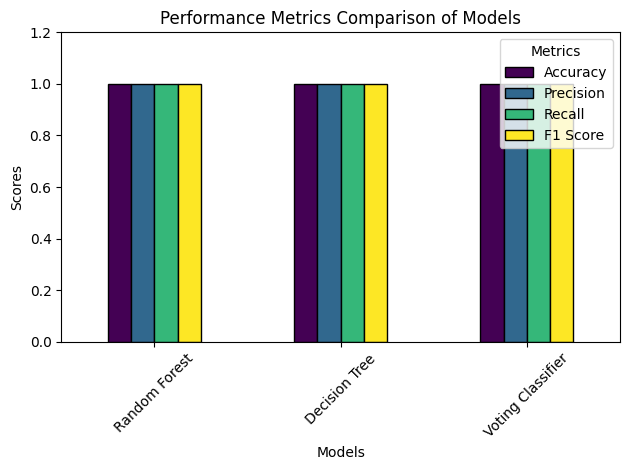

In [ ]:
metrics_df = pd.DataFrame(
    {
        "Accuracy": [0.999816, 0.999448, 0.999816],
        "Precision": [0.999816, 0.999449, 0.999816],
        "Recall": [0.999816, 0.999448, 0.999816],
        "F1 Score": [0.999816, 0.999448, 0.999816]
    },
    index=["Random Forest", "Decision Tree", "Voting Classifier"]
)

# Plotting
plt.figure(figsize=(12, 8))
metrics_df.plot(kind='bar', rot=45, colormap='viridis', edgecolor='black')

# Adding labels and title
plt.title('Performance Metrics Comparison of Models')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.ylim(0, 1.2)  # Assuming metrics range from 0 to 1

# Display the plot
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()